<a href="https://colab.research.google.com/github/janapriyaS/prodigy/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv('/content/train.csv')

In [3]:
# Feature selection: we'll use 'GrLivArea' for square footage, 'Bedrooms' and 'Bathrooms'
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF']  # Including 'OverallQual' and 'TotalBsmtSF' for a better model
target = 'SalePrice'

In [4]:
# Prepare the feature matrix X and target vector y
X = train_data[features]
y = train_data[target]


In [5]:
# Handle missing values (if any)
X = X.fillna(X.median())
y = y.fillna(y.median())


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1667657527.1633515
R^2 Score: 0.7825832328225167


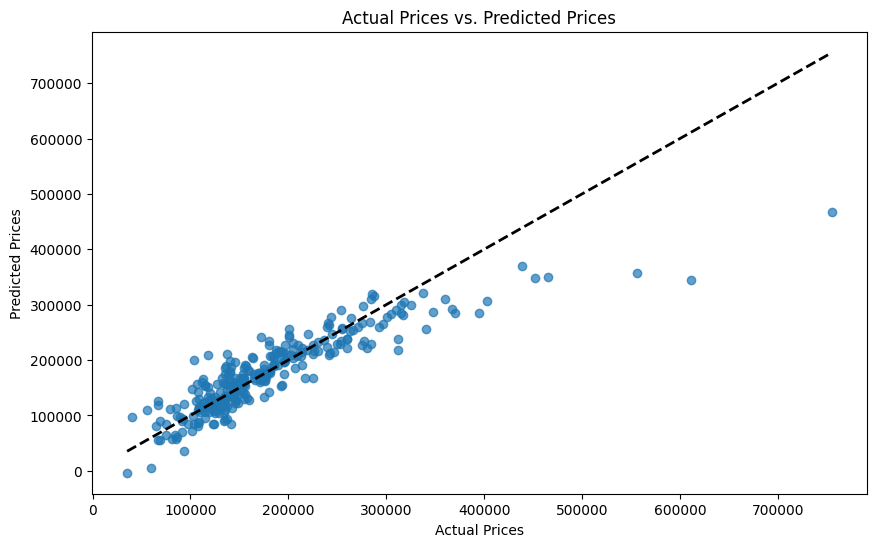

In [11]:
# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


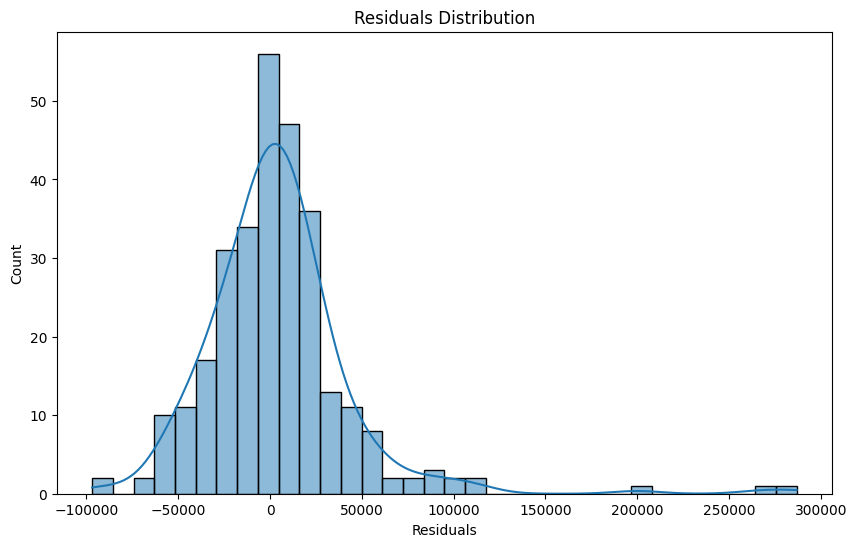

In [12]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()